In [1]:
import numpy as np
import yroots as yr
import matplotlib.pyplot as plt
import warnings

%load_ext autoreload
%autoreload 2

In [2]:
from yroots.polynomial import Polynomial

In [3]:
# function to filter out roots outside of the interval (allows for nicer plots)
def rootfilter(roots,a,b,tol):
    roots = roots[np.all(roots >= a - tol,axis = 1)]
    roots = roots[np.all(roots <= b + tol,axis = 1)]
    return roots

In [4]:
def printRoot(r1,r2,a,b):
    plt.figure(dpi=600)
    fig,ax = plt.subplots(1)
    fig.set_size_inches(6.5, 3)
    plt.xlim(a[0],b[0])
    plt.xlabel('$x$')
    plt.ylim(a[1],b[1])
    plt.ylabel('$y$')
    plt.title('Zero-Loci and Roots')

    dim = 2

    #print the contours
    contour_colors = ['#003cff','#50c878'] #royal blue and emerald green
    x = np.linspace(a[0],b[0],100)
    y = np.linspace(a[1],b[1],100)
    X,Y = np.meshgrid(x,y)
    funcs = [f,g]
    for i in range(dim):
        if isinstance(funcs[i], Polynomial):
            Z = np.zeros_like(X)
            for spot,num in np.ndenumerate(X):
                Z[spot] = funcs[i]([X[spot],Y[spot]])
            plt.contour(X,Y,Z,levels=[0],colors=contour_colors[i])
        else:
            plt.contour(X,Y,funcs[i](X,Y),levels=[0],colors=contour_colors[i])

    colors = ['w','#c3c3c3', 'C8', '#708090', '#897A57', '#D6C7A4','#73e600','#ccff99']

    plt.plot(np.real(r2[0]), np.real(r2[1]),'o',color='k',markeredgecolor='k',markersize=3,
         zorder=22,label='Second')
    plt.plot(np.real(r1[0]), np.real(r1[1]),'o',color='m',markeredgecolor='m',markersize=3,
         zorder=22,label='First')
    plt.legend()
    plt.show()
    
def printRoots(r1,r2,e=1e-10):
    if len(r1.shape) == 1:
        r2 = r2[0]
        a = np.zeros(len(r2))
        b = np.zeros(len(r2))
        for j in range(len(r2)):
            a[j] = min(r1[j],r2[j]) - e
            b[j] = max(r1[j],r2[j]) + e
        printRoot(r1,r2,a,b)
        return
    randLine = np.random.rand(len(r1[0]))
    order = np.argsort(r1@randLine, axis=0)
    r1 = r1[order]
    order = np.argsort(r2@randLine, axis=0)
    r2 = r2[order]
    a = np.zeros(len(r2[0]))
    b = np.zeros(len(r2[0]))
    for i in range(len(r2)):
        for j in range(len(r2[i])):
            a[j] = min(r1[i][j],r2[i][j]) - e - abs(r1[i][j]-r2[i][j])
            b[j] = max(r1[i][j],r2[i][j]) + e + abs(r1[i][j]-r2[i][j])
        printRoot(r1[i],r2[i],a,b)

In [5]:
dim = 2
def get_interval(steps,a,b):
    RAND = 0.5139303900908738
    for step in steps:
        diffs = ((b-a)*RAND)
        if step == 0:
            a += diffs
        elif step == 1:
            a[0] += diffs[0]
            b[1] = a[1] + diffs[1]
        elif step == 2:
            b[0] = a[0] + diffs[0]
            a[1] += diffs[1]
        elif step == 3:
            b = a + diffs
        else:
            raise ValueError('invalid step')
    return a,b
steps = []
# a,b = get_interval(steps,a,b)

In [6]:
import time
startTime = time.time()

# `test_roots01`

Percent Finished: 100%                                                  
Total intervals checked was 889
Methods used were ['constant_term_check', 'quadratic_check', 'Base Case', 'Spectral', 'Too Deep']
The percent solved by each was [ 0.225  98.4252  1.3498  0.      0.    ]


<Figure size 3600x2400 with 0 Axes>

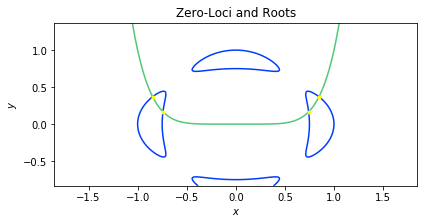

Number of roots: 4
Number found by yroots: 4
Distance between chebfun solutions and real solutions:
[1.40543009e-15 1.10500660e-15 1.29948273e-15 1.24126708e-15]
Distance between yroots solutions and real solutions:
[1.01791469e-15 3.01617683e-15 8.25232590e-16 1.97123217e-15]


In [51]:
###test_roots01
#01
f = lambda x,y: 144*(x**4+y**4)-225*(x**2+y**2) + 350*x**2*y**2+81
g = lambda x,y: y-x**6

r1 = np.loadtxt('chebfun_test_output/cftest1_1.csv',delimiter=',')
r3 = np.loadtxt('erik_test_solutions/cftest1_1.csv',delimiter=',')
a = np.array([min(r1[:,0]),min(r1[:,1])])
b = np.array([max(r1[:,0]),max(r1[:,1])])

r2 = yr.solve([f,g],a-1,b+1,plot=True)
#r2 = rootfilter(r2,a,b,1e-3)
print('Number of roots:',r1.shape[0])
print('Number found by yroots:',r2.shape[0])
if r1.shape[0] == r2.shape[0]:
    print('Distance between chebfun solutions and real solutions:')
    print(np.linalg.norm(np.sort(r1,axis=0)-np.sort(r3,axis=0),axis=1))
    print('Distance between yroots solutions and real solutions:')
    print(np.linalg.norm(np.sort(r2,axis=0)-np.sort(r3,axis=0),axis=1))

Percent Finished: 100%                                                  
Total intervals checked was 2521
Methods used were ['constant_term_check', 'quadratic_check', 'Base Case', 'Spectral', 'Too Deep']
The percent solved by each was [22.4911 76.1206  0.833   0.5553  0.    ]


<Figure size 3600x2400 with 0 Axes>

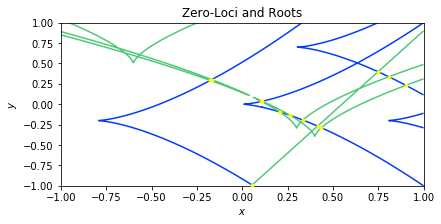

CPU times: user 14 s, sys: 459 ms, total: 14.5 s
Wall time: 15.7 s
Number of roots: 13
Number found by yroots: 13
Distance between chebfun solutions and real solutions:
[3.51956568e-14 2.28149740e-07 9.51087879e-07 6.68539700e-09
 3.03865322e-09 2.40649816e-10 4.01277189e-09 7.70393699e-09
 9.83171814e-07 2.30078665e-07 3.42685044e-14 1.48952049e-15
 2.51214793e-15]
Distance between yroots solutions and real solutions:
[2.29699650e-14 2.15413488e-14 1.73420728e-14 1.83058039e-13
 1.64739399e-13 2.95543105e-13 9.01947380e-14 8.40217941e-14
 1.60988320e-14 3.74216806e-14 1.57009246e-15 1.11022302e-15
 3.33066907e-16]


In [52]:
#02
f = lambda x,y: (y**2-x**3)*((y-0.7)**2-(x-0.3)**3)*((y+0.2)**2-(x+0.8)**3)*((y+0.2)**2-(x-0.8)**3)
g = lambda x,y: ((y+.4)**3-(x-.4)**2)*((y+.3)**3-(x-.3)**2)*((y-.5)**3-(x+.6)**2)*((y+0.3)**3-(2*x-0.8)**3)

r1 = np.loadtxt('chebfun_test_output/cftest1_2.csv',delimiter=',')
r3 = np.loadtxt('erik_test_solutions/cftest1_2.csv',delimiter=',')
a = np.array([min(r1[:,0]),min(r1[:,1])])-1
b = np.array([max(r1[:,0]),max(r1[:,1])])+1

a = np.array([-1.,-1.])
b = np.array([1.,1.])

%time r2 = yr.solve([f,g],a,b,plot=True)
r2 = rootfilter(r2,a,b,1e-3)
print('Number of roots:',r1.shape[0])
print('Number found by yroots:',r2.shape[0])
if r1.shape[0] == r2.shape[0]:
    print('Distance between chebfun solutions and real solutions:')
    print(np.linalg.norm(np.sort(r1,axis=0)-np.sort(r3,axis=0),axis=1))
    print('Distance between yroots solutions and real solutions:')
    print(np.linalg.norm(np.sort(r2,axis=0)-np.sort(r3,axis=0),axis=1))

Percent Finished: 100%                                                  
Total intervals checked was 1
Methods used were ['constant_term_check', 'quadratic_check', 'Base Case', 'Spectral', 'Too Deep']
The percent solved by each was [  0.   0.   0. 100.   0.]


<Figure size 3600x2400 with 0 Axes>

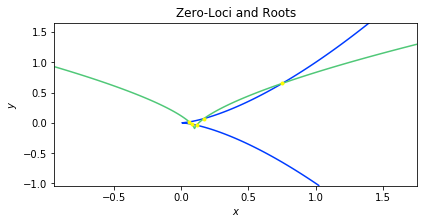

Number of roots: 5
Number found by yroots: 5
Distance between chebfun solutions and real solutions:
[3.98174628e-15 2.00657647e-15 5.67706512e-15 3.91818394e-15
 0.00000000e+00]
Distance between yroots solutions and real solutions:
[6.93837347e-15 1.47438825e-14 1.19579113e-14 3.79399531e-15
 9.42055475e-16]


In [55]:
#03
f = lambda x,y: y**2-x**3
g = lambda x,y: (y+.1)**3-(x-.1)**2

r1 = np.loadtxt('chebfun_test_output/cftest1_3.csv',delimiter=',')
r3 = np.loadtxt('erik_test_solutions//cftest1_3.csv',delimiter=',')
a = np.array([min(r1[:,0]),min(r1[:,1])])
b = np.array([max(r1[:,0]),max(r1[:,1])])
r2 = yr.solve([f,g],a-1,b+1,plot=True)
r2 = rootfilter(r2,a,b,1e-3)
print('Number of roots:',r1.shape[0])
print('Number found by yroots:',r2.shape[0])
if r1.shape[0] == r2.shape[0]:
    print('Distance between chebfun solutions and real solutions:')
    print(np.linalg.norm(np.sort(r1,axis=0)-np.sort(r3,axis=0),axis=1))
    print('Distance between yroots solutions and real solutions:')
    print(np.linalg.norm(np.sort(r2,axis=0)-np.sort(r3,axis=0),axis=1))

Percent Finished: 100%                                                  
Total intervals checked was 1
Methods used were ['constant_term_check', 'quadratic_check', 'Base Case', 'Spectral', 'Too Deep']
The percent solved by each was [  0.   0. 100.   0.   0.]


<Figure size 3600x2400 with 0 Axes>

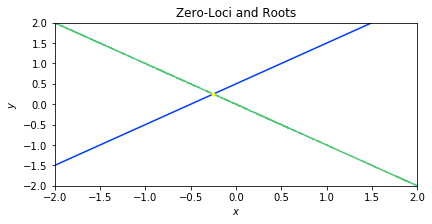

Number of roots: 1
Number found by yroots: 1
Distance between chebfun solutions and real solutions:
0.0
Distance between yroots solutions and real solutions:
0.0


In [63]:
#04
f = lambda x,y: x - y + .5
g = lambda x,y: x + y

r1 = np.loadtxt('chebfun_test_output/cftest1_4.csv',delimiter=',')
r3 = np.loadtxt('erik_test_solutions/cftest1_4.csv',delimiter=',')

#only one root
a = np.array([-1,-1])
b = np.array([1,1])
r2 = yr.solve([f,g],a-1,b+1,plot=True)
r2 = rootfilter(r2,a,b,1e-3)
print('Number of roots:',1)
print('Number found by yroots:',r2.shape[0])
print('Distance between chebfun solutions and real solutions:')
print(np.linalg.norm(r1-r3))
print('Distance between yroots solutions and real solutions:')
print(np.linalg.norm(r2-r3))

Percent Finished: 100%                                                  
Total intervals checked was 1
Methods used were ['constant_term_check', 'quadratic_check', 'Base Case', 'Spectral', 'Too Deep']
The percent solved by each was [  0.   0. 100.   0.   0.]


<Figure size 3600x2400 with 0 Axes>

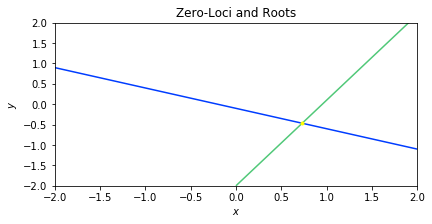

Number of roots: 1
Number found by yroots: 1
Distance between chebfun solutions and real solutions:
4.47545209131181e-16
Distance between yroots solutions and real solutions:
1.1102230246251565e-16


In [64]:
#05
### THIS ONE FAILS
f = lambda x,y: y + x/2 + 1/10
g = lambda x,y: y - 2.1*x + 2

r1 = np.loadtxt('chebfun_test_output/cftest1_5.csv',delimiter=',')
r3 = np.loadtxt('erik_test_solutions/cftest1_5.csv',delimiter=',')

#only one root
a = np.array([-1,-1])
b = np.array([1,1])
r2 = yr.solve([f,g],a-1,b+1,plot=True)
r2 = rootfilter(r2,a,b,1e-3)
print('Number of roots:',1)
print('Number found by yroots:',r2.shape[0])
print('Distance between chebfun solutions and real solutions:')
print(np.linalg.norm(r1-r3))
print('Distance between yroots solutions and real solutions:')
print(np.linalg.norm(r2-r3))

# `test_roots02`

Percent Finished: 100%                                                  
Total intervals checked was 6907
Methods used were ['constant_term_check', 'quadratic_check', 'Base Case', 'Spectral', 'Too Deep']
The percent solved by each was [67.96   31.5043  0.5357  0.      0.    ]


<Figure size 3600x2400 with 0 Axes>

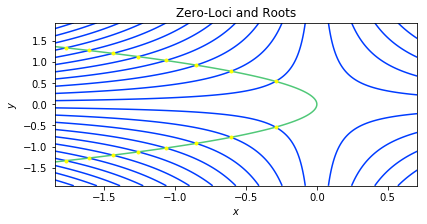

Number of roots: 6
Number found by yroots: 6
Distance between chebfun solutions and real solutions:
[3.14018492e-16 2.22044605e-16 1.57009246e-16 1.57009246e-16
 5.55111512e-17 2.28878340e-16]
Distance between yroots solutions and real solutions:
[1.57009246e-16 3.51083347e-16 0.00000000e+00 0.00000000e+00
 1.11022302e-16 1.24126708e-16]


In [65]:
#01
f = lambda x,y: np.cos(10*x*y)
g = lambda x,y: x + y**2

r1 = np.loadtxt('chebfun_test_output/cftest2_1.csv',delimiter=',')
r3 = np.loadtxt('erik_test_solutions//cftest2_1.csv',delimiter=',')
a = np.array([min(r1[:,0]),min(r1[:,1])])
b = np.array([max(r1[:,0]),max(r1[:,1])])
r2 = yr.solve([f,g],a-1,b+1,plot=True)
r2 = rootfilter(r2,a,b,1e-3)
print('Number of roots:',r1.shape[0])
print('Number found by yroots:',r2.shape[0])
if r1.shape[0] == r2.shape[0]:
    print('Distance between chebfun solutions and real solutions:')
    print(np.linalg.norm(np.sort(r1,axis=0)-np.sort(r3,axis=0),axis=1))
    print('Distance between yroots solutions and real solutions:')
    print(np.linalg.norm(np.sort(r2,axis=0)-np.sort(r3,axis=0),axis=1))

Percent Finished: 100%                                                  
Total intervals checked was 1
Methods used were ['constant_term_check', 'quadratic_check', 'Base Case', 'Spectral', 'Too Deep']
The percent solved by each was [  0.   0.   0. 100.   0.]


<Figure size 3600x2400 with 0 Axes>

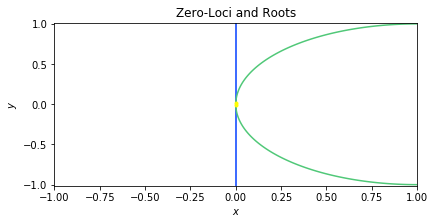

Number of roots: 2
Number found by yroots: 2
Distance between chebfun solutions and real solutions:
[1.49272955e-14 1.49272955e-14]
Distance between yroots solutions and real solutions:
[1.31457345e-14 1.31457345e-14]


In [66]:
#02
f = lambda x,y: x
g = lambda x,y: (x-.9999)**2 + y**2-1

r1 = np.loadtxt('chebfun_test_output/cftest2_2.csv',delimiter=',')
r3 = np.loadtxt('erik_test_solutions/cftest2_2.csv',delimiter=',')
a = np.array([min(r1[:,0]),min(r1[:,1])])
b = np.array([max(r1[:,0]),max(r1[:,1])])
r2 = yr.solve([f,g],a-1,b+1,plot=True)
r2 = rootfilter(r2,a,b,1e-3)
print('Number of roots:',r1.shape[0])
print('Number found by yroots:',r2.shape[0])
if r1.shape[0] == r2.shape[0]:
    print('Distance between chebfun solutions and real solutions:')
    print(np.linalg.norm(np.sort(r1,axis=0)-np.sort(r3,axis=0),axis=1))
    print('Distance between yroots solutions and real solutions:')
    print(np.linalg.norm(np.sort(r2,axis=0)-np.sort(r3,axis=0),axis=1))

Percent Finished: 100%                                                  
Total intervals checked was 1615
Methods used were ['constant_term_check', 'quadratic_check', 'Base Case', 'Spectral', 'Too Deep']
The percent solved by each was [27.9257 70.4644  1.6099  0.      0.    ]


<Figure size 3600x2400 with 0 Axes>

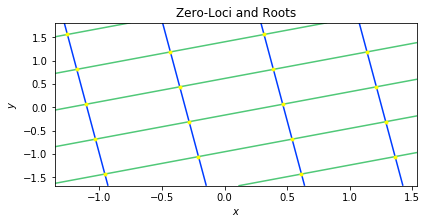

Number of roots: 5
Number found by yroots: 5
Distance between chebfun solutions and real solutions:
[3.88578059e-16 5.90091632e-16 5.55111512e-17 2.98936698e-16
 6.28036983e-16]
Distance between yroots solutions and real solutions:
[0.00000000e+00 0.00000000e+00 3.10316769e-16 1.75541673e-16
 0.00000000e+00]


In [67]:
#03
f = lambda x,y: np.sin(4*(x + y/10 + np.pi/10))
g = lambda x,y: np.cos(2*(x-2*y+ np.pi/7))

r1 = np.loadtxt('chebfun_test_output/cftest2_3.csv',delimiter=',')
r3 = np.loadtxt('erik_test_solutions/cftest2_3.csv',delimiter=',')
a = np.array([min(r1[:,0]),min(r1[:,1])])
b = np.array([max(r1[:,0]),max(r1[:,1])])
r2 = yr.solve([f,g],a-1,b+1,plot=True)
r2 = rootfilter(r2,a,b,1e-3)
print('Number of roots:',r1.shape[0])
print('Number found by yroots:',r2.shape[0])
if r1.shape[0] == r2.shape[0]:
    print('Distance between chebfun solutions and real solutions:')
    print(np.linalg.norm(np.sort(r1,axis=0)-np.sort(r3,axis=0),axis=1))
    print('Distance between yroots solutions and real solutions:')
    print(np.linalg.norm(np.sort(r2,axis=0)-np.sort(r3,axis=0),axis=1))

# `test_roots03`

Percent Finished: 100%                                                  
Total intervals checked was 1060
Methods used were ['constant_term_check', 'quadratic_check', 'Base Case', 'Spectral', 'Too Deep']
The percent solved by each was [ 0.4717 98.0189  1.5094  0.      0.    ]


<Figure size 3600x2400 with 0 Axes>

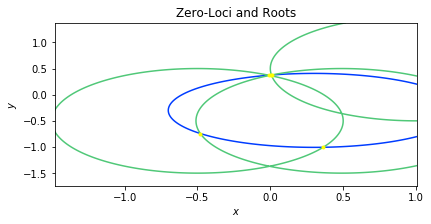

Number of roots: 4
Number found by yroots: 4
Distance between chebfun solutions and real solutions:
[1.11022302e-16 1.09599977e-13 2.89550330e-12 1.07967857e-12]
Distance between yroots solutions and real solutions:
[1.24126708e-16 6.44915597e-15 1.85016192e-12 7.33048878e-13]


In [68]:
#01
f = lambda x,y: ((x-.3)**2+2*(y+0.3)**2-1)
g = lambda x,y: ((x-.49)**2+(y+.5)**2-1)*((x+0.5)**2+(y+0.5)**2-1)*((x-1)**2+(y-0.5)**2-1)

r1 = np.loadtxt('chebfun_test_output/cftest3_1.csv',delimiter=',')
r3 = np.loadtxt('erik_test_solutions/cftest3_1.csv',delimiter=',')
a = np.array([min(r1[:,0]),min(r1[:,1])])
b = np.array([max(r1[:,0]),max(r1[:,1])])
r2 = yr.solve([f,g],a-1,b+1,plot=True)
r2 = rootfilter(r2,a,b,1e-3)
print('Number of roots:',r1.shape[0])
print('Number found by yroots:',r2.shape[0])
if r1.shape[0] == r2.shape[0]:
    print('Distance between chebfun solutions and real solutions:')
    print(np.linalg.norm(np.sort(r1,axis=0)-np.sort(r3,axis=0),axis=1))
    print('Distance between yroots solutions and real solutions:')
    print(np.linalg.norm(np.sort(r2,axis=0)-np.sort(r3,axis=0),axis=1))

Percent Finished: 100%                                                  
Total intervals checked was 12973
Methods used were ['constant_term_check', 'quadratic_check', 'Base Case', 'Spectral', 'Too Deep']
The percent solved by each was [5.01000e-01 9.79496e+01 1.45690e+00 9.25000e-02 0.00000e+00]


<Figure size 3600x2400 with 0 Axes>

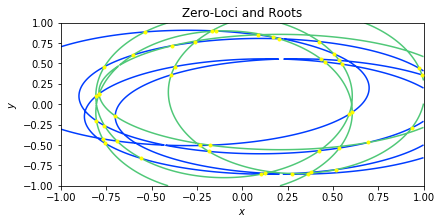

Number of roots: 45
Number found by yroots: 45
Distance between chebfun solutions and real solutions:
[1.41678007e-12 1.43614118e-14 1.71644354e-09 1.95374539e-09
 6.53901569e-15 1.02237014e-14 7.68624006e-15 5.44122558e-15
 7.99437673e-15 3.92523115e-15 1.49666135e-14 2.43490919e-15
 1.26054323e-14 6.99638732e-15 4.31367366e-14 9.39976079e-15
 6.37663435e-14 1.86062581e-14 7.42453088e-14 1.46058953e-14
 6.97101726e-14 3.05962420e-14 2.72648142e-12 2.83935514e-09
 3.20066051e-09 3.32847103e-15 4.40880523e-14 7.16665302e-14
 5.28173654e-14 5.74969595e-14 4.51555152e-15 6.88897636e-15
 1.19265033e-14 6.99087965e-15 7.27090136e-15 2.73908018e-14
 1.72066661e-14 2.07596863e-14 4.46580225e-15 2.19363888e-14
 1.21339809e-14 4.79951609e-14 5.81676347e-15 3.28032861e-15
 6.46794248e-15]
Distance between yroots solutions and real solutions:
[4.49457992e-14 2.90573173e-15 1.61651561e-13 9.02280226e-13
 1.09344287e-15 2.93107289e-15 4.39906173e-15 1.05325004e-15
 1.57792339e-15 6.24987526e-15 1.9

In [69]:
#02
f = lambda x,y: ((x-0.1)**2+2*(y-0.1)**2-1)*((x+0.3)**2+2*(y-0.2)**2-1)*((x-0.3)**2+2*(y+0.15)**2-1)*((x-0.13)**2+2*(y+0.15)**2-1)
g = lambda x,y: (2*(x+0.1)**2+(y+0.1)**2-1)*(2*(x+0.1)**2+(y-0.1)**2-1)*(2*(x-0.3)**2+(y-0.15)**2-1)*((x-0.21)**2+2*(y-0.15)**2-1)

r1 = np.loadtxt('chebfun_test_output/cftest3_2.csv',delimiter=',')
r3 = np.loadtxt('erik_test_solutions/cftest3_2.csv',delimiter=',')
a = np.array([min(r1[:,0]),min(r1[:,1])])
b = np.array([max(r1[:,0]),max(r1[:,1])])

a = np.array([-1.,-1.])
b = np.array([1.,1.])

r2 = yr.solve([f,g],a,b,plot=True, abs_approx_tol=1e-15, max_cond_num=1e10)
r2 = rootfilter(r2,a,b,1e-3)
print('Number of roots:',r1.shape[0])
print('Number found by yroots:',r2.shape[0])
if r1.shape[0] == r2.shape[0]:
    print('Distance between chebfun solutions and real solutions:')
    print(np.linalg.norm(np.sort(r1,axis=0)-np.sort(r3,axis=0),axis=1))
    print('Distance between yroots solutions and real solutions:')
    print(np.linalg.norm(np.sort(r2,axis=0)-np.sort(r3,axis=0),axis=1))
else:
    print("chebfun solutions:")
    print(np.sort(r1,axis=0))
    print("yroots solutions:")
    print(np.sort(r2,axis=0))

# `test_roots04`

Percent Finished: 100%                                                  
Total intervals checked was 1663
Methods used were ['constant_term_check', 'quadratic_check', 'Base Case', 'Spectral', 'Too Deep']
The percent solved by each was [14.1912 84.3055  1.5033  0.      0.    ]


<Figure size 3600x2400 with 0 Axes>

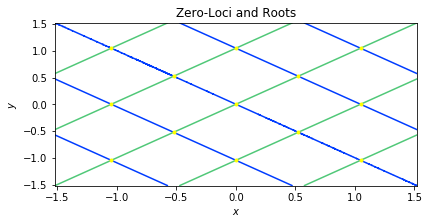

Number of roots: 5
Number found by yroots: 5
Distance between chebfun solutions and real solutions:
[3.14018492e-16 3.14018492e-16 4.44893803e-18 3.14018492e-16
 3.14018492e-16]
Distance between yroots solutions and real solutions:
[3.14018492e-16 1.57009246e-16 1.58507202e-17 3.14018492e-16
 3.14018492e-16]


In [70]:
#01
f = lambda x,y: np.sin(3*(x+y))
g = lambda x,y: np.sin(3*(x-y))

r1 = np.loadtxt('chebfun_test_output/cftest4_1.csv',delimiter=',')
r3 = np.loadtxt('erik_test_solutions/cftest4_1.csv',delimiter=',')
a = np.array([min(r1[:,0]),min(r1[:,1])])
b = np.array([max(r1[:,0]),max(r1[:,1])])
r2 = yr.solve([f,g],a-1,b+1,plot=True)
r2 = rootfilter(r2,a,b,1e-3)
print('Number of roots:',r1.shape[0])
print('Number found by yroots:',r2.shape[0])
if r1.shape[0] == r2.shape[0]:
    print('Distance between chebfun solutions and real solutions:')
    print(np.linalg.norm(np.sort(r1,axis=0)-np.sort(r3,axis=0),axis=1))
    print('Distance between yroots solutions and real solutions:')
    print(np.linalg.norm(np.sort(r2,axis=0)-np.sort(r3,axis=0),axis=1))
else:
    print("chebfun solutions:")
    print(np.sort(r1,axis=0))
    print("yroots solutions:")
    print(np.sort(r2,axis=0))

/Users/erikhalesparkinson/anaconda/lib/python3.6/site-packages/matplotlib/contour.py:1230: UserWarning: No contour levels were found within the data range.
  warnings.warn("No contour levels were found"
/Users/erikhalesparkinson/anaconda/lib/python3.6/site-packages/numpy/core/numeric.py:501: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


[[-82.43005303 +85.29158015j 114.45961114-119.36174864j]
 [-82.43005303 -85.29158015j 114.45961114+119.36174864j]
 [ 54.15360978  +0.j         -76.68311127  -0.j        ]
 [ -0.90030279  +0.j           0.36237507  +0.j        ]]
[[-82.43005303 +85.29158015j 114.45961114-119.36174864j]
 [-82.43005303 -85.29158015j 114.45961114+119.36174864j]
 [ 54.15360978  +0.j         -76.68311127  +0.j        ]
 [ -0.90030279  +0.j           0.36237507  +0.j        ]]
Percent Finished: 100%                                                  
Total intervals checked was 1
Methods used were ['constant_term_check', 'quadratic_check', 'Base Case', 'Spectral', 'Too Deep']
The percent solved by each was [  0.   0.   0. 100.   0.]


<Figure size 3600x2400 with 0 Axes>

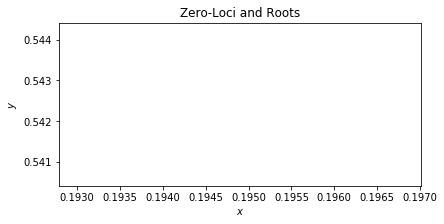

<Figure size 3600x2400 with 0 Axes>

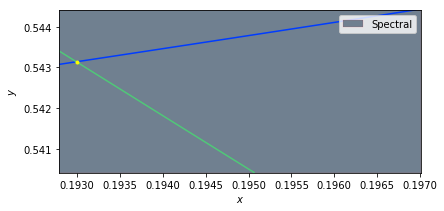

Number of roots: 1
Number found by yroots: 1
Distance between chebfun solutions and real solutions:
[4.4134996e-14]
Distance between yroots solutions and real solutions:
[5.11459664e-06]


In [89]:
#02
f = lambda x,y: ((90000*y**10 + (-1440000)*y**9 + (360000*x**4 + 720000*x**3 + 504400*x**2 + 144400*x + 9971200)*(y**8) + 
                ((-4680000)*x**4 + (-9360000)*x**3 + (-6412800)*x**2 + (-1732800)*x + (-39554400))*(y**7) + (540000*x**8 + 
                2160000*x**7 + 3817600*x**6 + 3892800*x**5 + 27577600*x**4 + 51187200*x**3 + 34257600*x**2 + 8952800*x + 100084400)*(y**6) + 
                ((-5400000)*x**8 + (-21600000)*x**7 + (-37598400)*x**6 + (-37195200)*x**5 + (-95198400)*x**4 + 
                (-153604800)*x**3 + (-100484000)*x**2 + (-26280800)*x + (-169378400))*(y**5) + (360000*x**12 + 2160000*x**11 + 
                6266400*x**10 + 11532000*x**9 + 34831200*x**8 + 93892800*x**7 + 148644800*x**6 + 141984000*x**5 + 206976800*x**4 + 
                275671200*x**3 + 176534800*x**2 + 48374000*x + 194042000)*(y**4) + ((-2520000)*x**12 + (-15120000)*x**11 + (-42998400)*x**10 + 
                (-76392000)*x**9 + (-128887200)*x**8 + (-223516800)*x**7 + (-300675200)*x**6 + (-274243200)*x**5 + (-284547200)*x**4 + 
                (-303168000)*x**3 + (-190283200)*x**2 + (-57471200)*x + (-147677600))*(y**3) + (90000*x**16 + 720000*x**15 + 3097600*x**14 + 
                9083200*x**13 + 23934400*x**12 + 58284800*x**11 + 117148800*x**10 + 182149600*x**9 + 241101600*x**8 + 295968000*x**7 + 
                320782400*x**6 + 276224000*x**5 + 236601600*x**4 + 200510400*x**3 + 123359200*x**2 + 43175600*x + 70248800)*(y**2) + 
                ((-360000)*x**16 + (-2880000)*x**15 + (-11812800)*x**14 + (-32289600)*x**13 + (-66043200)*x**12 + (-107534400)*x**11 + 
                (-148807200)*x**10 + (-184672800)*x**9 + (-205771200)*x**8 + (-196425600)*x**7 + (-166587200)*x**6 + (-135043200)*x**5 + 
                (-107568800)*x**4 + (-73394400)*x**3 + (-44061600)*x**2 + (-18772000)*x + (-17896000))*y + (144400*x**18 + 1299600*x**17 + 
                5269600*x**16 + 12699200*x**15 + 21632000*x**14 + 32289600*x**13 + 48149600*x**12 + 63997600*x**11 + 67834400*x**10 + 
                61884000*x**9 + 55708800*x**8 + 45478400*x**7 + 32775200*x**6 + 26766400*x**5 + 21309200*x**4 + 11185200*x**3 + 6242400*x**2 + 
                3465600*x + 1708800)))
g = lambda x,y: 1e-4*(y**7 + (-3)*y**6 + (2*x**2 + (-1)*x + 2)*y**5 + (x**3 + (-6)*x**2 + x + 2)*y**4 + (x**4 + (-2)*x**3 + 2*x**2 + 
                x + (-3))*y**3 + (2*x**5 + (-3)*x**4 + x**3 + 10*x**2 + (-1)*x + 1)*y**2 + ((-1)*x**5 + 3*x**4 + 4*x**3 + (-12)*x**2)*y + 
                (x**7 + (-3)*x**5 + (-1)*x**4 + (-4)*x**3 + 4*x**2))

r1 = np.loadtxt('chebfun_test_output/cftest4_2.csv',delimiter=',')[0].reshape(1,2)
r3 = np.loadtxt('erik_test_solutions/cftest4_2.csv',delimiter=',')[0].reshape(1,2)
a = np.array([-1.,-1.])
b = np.array([1.,1.])

steps = [0,2,3,1,3,1,3,2,2]
a,b = get_interval(steps,a,b)

r2 = yr.solve([f,g],a,b,plot=True,plot_intervals=True)
# r2 = rootfilter(r2,a,b,1e-5)
print('Number of roots:',r1.shape[0])
print('Number found by yroots:',r2.shape[0])
if r1.shape[0] == r2.shape[0]:
    print('Distance between chebfun solutions and real solutions:')
    print(np.linalg.norm(np.sort(r1,axis=0)-np.sort(r3,axis=0),axis=1))
    print('Distance between yroots solutions and real solutions:')
    print(np.linalg.norm(np.sort(r2,axis=0)-np.sort(r3,axis=0),axis=1))
else:
    print("chebfun solutions:")
    print(np.sort(r1,axis=0))
    print("yroots solutions:")
    print(np.sort(r2,axis=0))

# `test_roots05`

Percent Finished: 100%                                                  
Total intervals checked was 12532
Methods used were ['constant_term_check', 'quadratic_check', 'Base Case', 'Spectral', 'Too Deep']
The percent solved by each was [26.4603 72.2151  1.3246  0.      0.    ]


<Figure size 3600x2400 with 0 Axes>

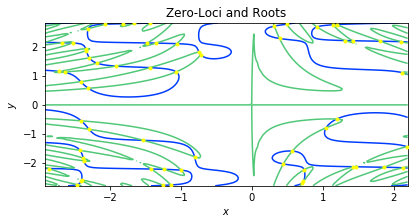

Number of roots: 10
Number found by yroots: 10
Distance between chebfun solutions and yroots solutions:
[6.59438833e-15 1.58338200e-14 1.73706447e-14 1.51434583e-14
 1.35178487e-15 1.53997178e-14 8.95090418e-16 9.08553235e-15
 8.22764404e-15 4.98983189e-15]


In [19]:
#01
f = lambda x,y: 2*x*y*np.cos(y**2)*np.cos(2*x)-np.cos(x*y)
g = lambda x,y: 2*np.sin(x*y**2)*np.sin(3*x*y)-np.sin(x*y)

r1 = np.loadtxt('chebfun_test_output/cftest5_1.csv',delimiter=',')
a = np.array([min(r1[:,0]),min(r1[:,1])])
b = np.array([max(r1[:,0]),max(r1[:,1])])
r2 = yr.solve([f,g],a-1,b+1,plot=True)
r2 = rootfilter(r2,a,b,1e-3)
print('Number of roots:',r1.shape[0])
print('Number found by yroots:',r2.shape[0])
if r1.shape[0] == r2.shape[0]:
    print('Distance between chebfun solutions and yroots solutions:')
    print(np.linalg.norm(np.sort(r1,axis=0)-np.sort(r2,axis=0),axis=1))
else:
    print("chebfun solutions:")
    print(np.sort(r1,axis=0))
    print("yroots solutions:")
    print(np.sort(r2,axis=0))

# `test_roots06`

Percent Finished: 100%                                                  
Total intervals checked was 4
Methods used were ['constant_term_check', 'quadratic_check', 'Base Case', 'Spectral', 'Too Deep']
The percent solved by each was [  0.   0.   0. 100.   0.]


<Figure size 3600x2400 with 0 Axes>

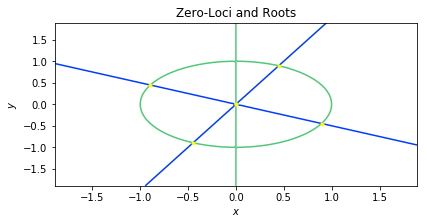

Number of roots: 5
Number found by yroots: 6
chebfun solutions:
[[-8.94427191e-01 -8.94427191e-01]
 [-4.47213595e-01 -4.47213595e-01]
 [-9.89338159e-18 -1.06428375e-08]
 [ 4.47213595e-01  4.47213595e-01]
 [ 8.94427191e-01  8.94427191e-01]]
yroots solutions:
[[-8.94427191e-01 -8.94427191e-01]
 [-4.47213595e-01 -4.47213595e-01]
 [ 1.11022302e-16 -2.73726380e-08]
 [ 2.22044605e-16  2.53446629e-08]
 [ 4.47213595e-01  4.47213595e-01]
 [ 8.94427191e-01  8.94427191e-01]]


In [20]:
#01
f = lambda x,y: (y - 2*x)*(y+0.5*x)
g = lambda x,y: x*(x**2+y**2-1)

r1 = np.loadtxt('chebfun_test_output/cftest6_1.csv',delimiter=',')
a = np.array([min(r1[:,0]),min(r1[:,1])])
b = np.array([max(r1[:,0]),max(r1[:,1])])
r2 = yr.solve([f,g],a-1,b+1,plot=True)
r2 = rootfilter(r2,a,b,1e-3)
print('Number of roots:',r1.shape[0])
print('Number found by yroots:',r2.shape[0])
if r1.shape[0] == r2.shape[0]:
    print('Distance between chebfun solutions and yroots solutions:')
    print(np.linalg.norm(np.sort(r1,axis=0)-np.sort(r2,axis=0),axis=1))
else:
    print("chebfun solutions:")
    print(np.sort(r1,axis=0))
    print("yroots solutions:")
    print(np.sort(r2,axis=0))

Percent Finished: 100%                                                  
Total intervals checked was 4
Methods used were ['constant_term_check', 'quadratic_check', 'Base Case', 'Spectral', 'Too Deep']
The percent solved by each was [  0.   0.   0. 100.   0.]


<Figure size 3600x2400 with 0 Axes>

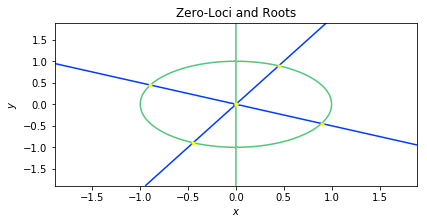

Number of roots: 5
Number found by yroots: 6
chebfun solutions:
[[-8.94427191e-01 -8.94427191e-01]
 [-4.47213595e-01 -4.47213595e-01]
 [-9.89338159e-18 -1.06428375e-08]
 [ 4.47213595e-01  4.47213595e-01]
 [ 8.94427191e-01  8.94427191e-01]]
yroots solutions:
[[-8.94427191e-01 -8.94427191e-01]
 [-4.47213595e-01 -4.47213595e-01]
 [ 1.00000000e-04 -5.00000030e-05]
 [ 1.00000000e-04  2.00000003e-04]
 [ 4.47213595e-01  4.47213595e-01]
 [ 8.94427191e-01  8.94427191e-01]]


In [21]:
#02
f = lambda x,y: (y - 2*x)*(y+.5*x)
g = lambda x,y: (x-.0001)*(x**2+y**2-1)

r1 = np.loadtxt('chebfun_test_output/cftest6_2.csv',delimiter=',')
a = np.array([min(r1[:,0]),min(r1[:,1])])
b = np.array([max(r1[:,0]),max(r1[:,1])])
r2 = yr.solve([f,g],a-1,b+1,plot=True)
r2 = rootfilter(r2,a,b,1e-3)
print('Number of roots:',r1.shape[0])
print('Number found by yroots:',r2.shape[0])
if r1.shape[0] == r2.shape[0]:
    print('Distance between chebfun solutions and yroots solutions:')
    print(np.linalg.norm(np.sort(r1,axis=0)-np.sort(r2,axis=0),axis=1))
else:
    print("chebfun solutions:")
    print(np.sort(r1,axis=0))
    print("yroots solutions:")
    print(np.sort(r2,axis=0))

Percent Finished: 100%                                                  
Total intervals checked was 4
Methods used were ['constant_term_check', 'quadratic_check', 'Base Case', 'Spectral', 'Too Deep']
The percent solved by each was [  0.   0.   0. 100.   0.]


<Figure size 3600x2400 with 0 Axes>

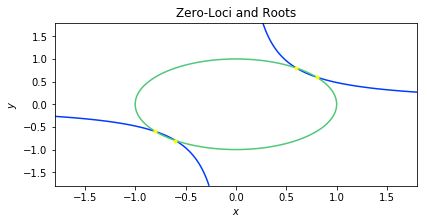

Number of roots: 4
Number found by yroots: 4
Distance between chebfun solutions and yroots solutions:
[1.49365232e-15 1.25607397e-15 1.33688556e-15 1.18018326e-15]


In [22]:
#03
f = lambda x,y: 25*x*y - 12
g = lambda x,y: x**2+y**2-1

r1 = np.loadtxt('chebfun_test_output/cftest6_3.csv',delimiter=',')
a = np.array([min(r1[:,0]),min(r1[:,1])])
b = np.array([max(r1[:,0]),max(r1[:,1])])
r2 = yr.solve([f,g],a-1,b+1,plot=True)
r2 = rootfilter(r2,a,b,1e-3)
print('Number of roots:',r1.shape[0])
print('Number found by yroots:',r2.shape[0])
if r1.shape[0] == r2.shape[0]:
    print('Distance between chebfun solutions and yroots solutions:')
    print(np.linalg.norm(np.sort(r1,axis=0)-np.sort(r2,axis=0),axis=1))
else:
    print("chebfun solutions:")
    print(np.sort(r1,axis=0))
    print("yroots solutions:")
    print(np.sort(r2,axis=0))

# `test_roots07`

Percent Finished: 100%                                                  
Total intervals checked was 2074
Methods used were ['constant_term_check', 'quadratic_check', 'Base Case', 'Spectral', 'Too Deep']
The percent solved by each was [ 0.1446 98.3124  1.5429  0.      0.    ]


<Figure size 3600x2400 with 0 Axes>

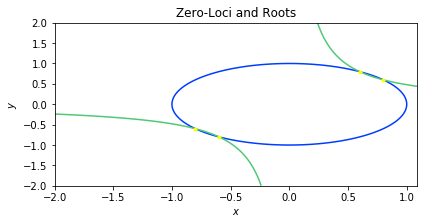

Number of roots: 4
Number found by yroots: 4
Distance between chebfun solutions and yroots solutions:
[9.15513360e-16 1.66533454e-15 1.26584901e-15 1.42177919e-15]


In [40]:
#01
f = lambda x,y: (x**2+y**2-1)*(x-1.1)
g = lambda x,y: (25*x*y-12)*(x-1.1)

r1 = np.loadtxt('chebfun_test_output/cftest7_1.csv',delimiter=',')
a = np.array([min(r1[:,0]),min(r1[:,1])])
b = np.array([max(r1[:,0]),max(r1[:,1])])
#Undefined at x = 1.1
a = np.array([-2.,-2.])
b = np.array([1.09,2.])
r2 = yr.solve([f,g],a,b,plot=True)
r2 = rootfilter(r2,a,b,1e-3)
print('Number of roots:',r1.shape[0])
print('Number found by yroots:',r2.shape[0])
if r1.shape[0] == r2.shape[0]:
    print('Distance between chebfun solutions and yroots solutions:')
    print(np.linalg.norm(np.sort(r1,axis=0)-np.sort(r2,axis=0),axis=1))
else:
    print("chebfun solutions:")
    print(np.sort(r1,axis=0))
    print("yroots solutions:")
    print(np.sort(r2,axis=0))

Percent Finished: 100%                                                  
Total intervals checked was 1393
Methods used were ['constant_term_check', 'quadratic_check', 'Base Case', 'Spectral', 'Too Deep']
The percent solved by each was [18.5212 80.3302  0.      1.1486  0.    ]


<Figure size 3600x2400 with 0 Axes>

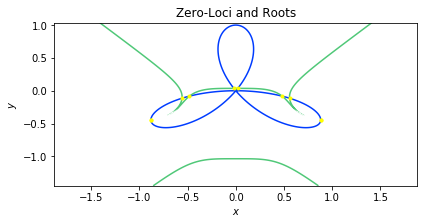

Number of roots: 10
Number found by yroots: 10
Distance between chebfun solutions and yroots solutions:
[2.98724274e-14 7.60787424e-13 1.54105715e-13 2.92840901e-13
 5.60485710e-13 1.45527689e-12 6.64699679e-15 3.78639870e-15
 8.21565698e-14 1.01918475e-13]


In [10]:
#02
f = lambda x,y: y**4 + (-1)*y**3 + (2*x**2)*(y**2) + (3*x**2)*y + (x**4)
h = lambda x,y: y**10-2*(x**8)*(y**2)+4*(x**4)*y-2
g = lambda x,y: h(2*x,2*(y+.5))

r1 = np.loadtxt('chebfun_test_output/cftest7_2.csv',delimiter=',')
r1 = np.loadtxt('erik_test_solutions/cftest7_2.csv',delimiter=',')
a = np.array([min(r1[:,0]),min(r1[:,1])])
b = np.array([max(r1[:,0]),max(r1[:,1])])
r2 = yr.solve([f,g],a-1,b+1,plot=True)
r2 = rootfilter(r2,a,b,1e-3)
print('Number of roots:',r1.shape[0])
print('Number found by yroots:',r2.shape[0])
if r1.shape[0] == r2.shape[0]:
    print('Distance between chebfun solutions and yroots solutions:')
    print(np.linalg.norm(np.sort(r1,axis=0)-np.sort(r2,axis=0),axis=1))
else:
    print("chebfun solutions:")
    print(np.sort(r1,axis=0))
    print("yroots solutions:")
    print(np.sort(r2,axis=0))

Percent Finished: 100%                                                  
Total intervals checked was 361
Methods used were ['constant_term_check', 'quadratic_check', 'Base Case', 'Spectral', 'Too Deep']
The percent solved by each was [11.9114 86.4266  1.662   0.      0.    ]


<Figure size 3600x2400 with 0 Axes>

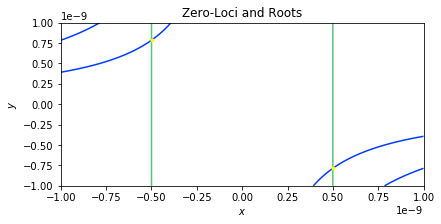

Number of roots: 2
Number found by yroots: 2
Distance between chebfun solutions and yroots solutions:
[1.80778029e-22 1.78421709e-22]


In [25]:
#03
e = 1e-09
f = lambda x,y: np.cos(x*y/(e**2))+np.sin(3*x*y/(e**2))
g = lambda x,y: np.cos(y/e)-np.cos(2*x*y/(e**2))

r1 = np.loadtxt('chebfun_test_output/cftest7_3.csv',delimiter=',')
a = np.array([-e,-e])
b = np.array([e,e])
r2 = yr.solve([f,g],a,b,plot=True)
r2 = rootfilter(r2,a,b,1e-3)
print('Number of roots:',r1.shape[0])
print('Number found by yroots:',r2.shape[0])
if r1.shape[0] == r2.shape[0]:
    print('Distance between chebfun solutions and yroots solutions:')
    print(np.linalg.norm(np.sort(r1,axis=0)-np.sort(r2,axis=0),axis=1))
else:
    print("chebfun solutions:")
    print(np.sort(r1,axis=0))
    print("yroots solutions:")
    print(np.sort(r2,axis=0))

# `test_roots08`

Percent Finished: 100%                                                  
Total intervals checked was 9565
Methods used were ['constant_term_check', 'quadratic_check', 'Base Case', 'Spectral', 'Too Deep']
The percent solved by each was [40.9827 57.8777  1.1396  0.      0.    ]


<Figure size 3600x2400 with 0 Axes>

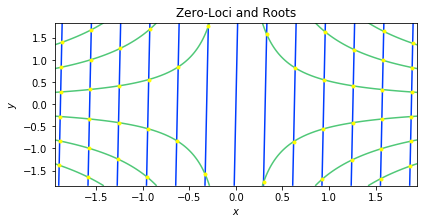

Number of roots: 8
Number found by yroots: 8
Distance between chebfun solutions and yroots solutions:
[1.23314746e-14 1.01030295e-14 1.39892507e-14 1.19950337e-14
 2.59184175e-15 9.54791801e-15 6.77599955e-15 5.44462246e-15]


In [26]:
#01
f = lambda x,y: np.sin(10*x-y/10)
g = lambda x,y: np.cos(3*x*y)

r1 = np.loadtxt('chebfun_test_output/cftest8_1.csv',delimiter=',')
a = np.array([min(r1[:,0]),min(r1[:,1])])
b = np.array([max(r1[:,0]),max(r1[:,1])])
r2 = yr.solve([f,g],a-1,b+1,plot=True)
r2 = rootfilter(r2,a,b,1e-3)
print('Number of roots:',r1.shape[0])
print('Number found by yroots:',r2.shape[0])
if r1.shape[0] == r2.shape[0]:
    print('Distance between chebfun solutions and yroots solutions:')
    print(np.linalg.norm(np.sort(r1,axis=0)-np.sort(r2,axis=0),axis=1))
else:
    print("chebfun solutions:")
    print(np.sort(r1,axis=0))
    print("yroots solutions:")
    print(np.sort(r2,axis=0))

Percent Finished: 100%                                                  
Total intervals checked was 6865
Methods used were ['constant_term_check', 'quadratic_check', 'Base Case', 'Spectral', 'Too Deep']
The percent solved by each was [57.8004 41.3984  0.8012  0.      0.    ]


<Figure size 3600x2400 with 0 Axes>

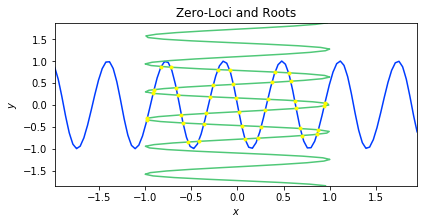

Number of roots: 39
Number found by yroots: 39
Distance between chebfun solutions and yroots solutions:
[2.59184175e-15 5.00955463e-15 6.12235404e-15 3.11060638e-15
 1.48396581e-14 1.14874557e-14 6.96880546e-15 5.42648122e-15
 2.38439619e-15 2.14491526e-15 1.21168268e-14 1.31809472e-14
 2.01146554e-14 4.05269424e-15 2.55592535e-15 3.07874273e-15
 4.14897118e-15 3.27930100e-15 4.43225345e-15 3.93903870e-15
 2.10945117e-14 4.72571279e-15 7.08920001e-15 8.66134073e-15
 2.96828980e-15 1.87837793e-15 2.58342242e-14 1.27057495e-14
 1.05187407e-14 1.18206171e-14 5.00093550e-15 9.99200722e-16
 6.75322301e-16 4.96134311e-15 4.71027738e-15 1.86107292e-15
 4.34266117e-15 7.79136136e-15 7.03043854e-15]


In [27]:
#02
f = lambda x,y: np.sin(10*x-y/10) + y
g = lambda x,y: np.cos(10*y-x/10) - x

r1 = np.loadtxt('chebfun_test_output/cftest8_2.csv',delimiter=',')
a = np.array([min(r1[:,0]),min(r1[:,1])])
b = np.array([max(r1[:,0]),max(r1[:,1])])
r2 = yr.solve([f,g],a-1,b+1,plot=True)
r2 = rootfilter(r2,a,b,1e-3)
print('Number of roots:',r1.shape[0])
print('Number found by yroots:',r2.shape[0])
if r1.shape[0] == r2.shape[0]:
    print('Distance between chebfun solutions and yroots solutions:')
    print(np.linalg.norm(np.sort(r1,axis=0)-np.sort(r2,axis=0),axis=1))
else:
    print("chebfun solutions:")
    print(np.sort(r1,axis=0))
    print("yroots solutions:")
    print(np.sort(r2,axis=0))

# `test_roots09`

Percent Finished: 100%                                                  
Total intervals checked was 346
Methods used were ['constant_term_check', 'quadratic_check', 'Base Case', 'Spectral', 'Too Deep']
The percent solved by each was [11.5607 87.2832  1.1561  0.      0.    ]


<Figure size 3600x2400 with 0 Axes>

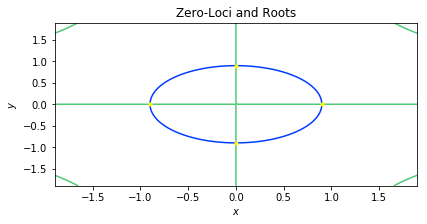

Number of roots: 4
Number found by yroots: 4
Distance between chebfun solutions and yroots solutions:
[1.25607397e-15 2.69654656e-15 1.34172696e-15 4.71027738e-16]


In [28]:
#01
f = lambda x,y: x**2+y**2-.9**2
g = lambda x,y: np.sin(x*y)

r1 = np.loadtxt('chebfun_test_output/cftest9_1.csv',delimiter=',')
a = np.array([min(r1[:,0]),min(r1[:,1])])
b = np.array([max(r1[:,0]),max(r1[:,1])])
r2 = yr.solve([f,g],a-1,b+1,plot=True)
r2 = rootfilter(r2,a,b,1e-3)
print('Number of roots:',r1.shape[0])
print('Number found by yroots:',r2.shape[0])
if r1.shape[0] == r2.shape[0]:
    print('Distance between chebfun solutions and yroots solutions:')
    print(np.linalg.norm(np.sort(r1,axis=0)-np.sort(r2,axis=0),axis=1))
else:
    print("chebfun solutions:")
    print(np.sort(r1,axis=0))
    print("yroots solutions:")
    print(np.sort(r2,axis=0))

Percent Finished: 100%                                                  
Total intervals checked was 4
Methods used were ['constant_term_check', 'quadratic_check', 'Base Case', 'Spectral', 'Too Deep']
The percent solved by each was [  0.   0.   0. 100.   0.]


<Figure size 3600x2400 with 0 Axes>

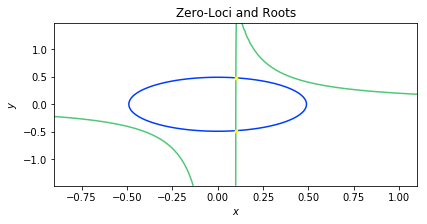

Number of roots: 2
Number found by yroots: 2
Distance between chebfun solutions and yroots solutions:
[5.72195850e-16 1.04037139e-15]


In [29]:
#02
f = lambda x,y: x**2+y**2-.49**2
g = lambda x,y: (x-.1)*(x*y-.2)

r1 = np.loadtxt('chebfun_test_output/cftest9_2.csv',delimiter=',')
a = np.array([min(r1[:,0]),min(r1[:,1])])
b = np.array([max(r1[:,0]),max(r1[:,1])])
r2 = yr.solve([f,g],a-1,b+1,plot=True)
r2 = rootfilter(r2,a,b,1e-3)
print('Number of roots:',r1.shape[0])
print('Number found by yroots:',r2.shape[0])
if r1.shape[0] == r2.shape[0]:
    print('Distance between chebfun solutions and yroots solutions:')
    print(np.linalg.norm(np.sort(r1,axis=0)-np.sort(r2,axis=0),axis=1))
else:
    print("chebfun solutions:")
    print(np.sort(r1,axis=0))
    print("yroots solutions:")
    print(np.sort(r2,axis=0))

# `test_roots10`

Percent Finished: 100%                                                  
Total intervals checked was 2944
Methods used were ['constant_term_check', 'quadratic_check', 'Base Case', 'Spectral', 'Too Deep']
The percent solved by each was [38.1454 60.7337  1.1209  0.      0.    ]


<Figure size 3600x2400 with 0 Axes>

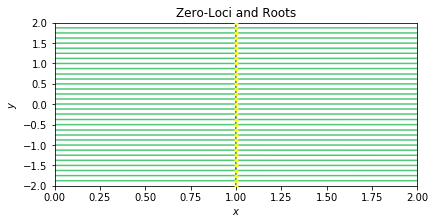

Number of roots: 17
Number found by yroots: 17
Distance between chebfun solutions and yroots solutions:
[2.40177963e-15 2.75773678e-15 1.37327004e-15 2.48253415e-16
 1.33688556e-15 5.66104887e-16 2.22044605e-16 1.94289029e-16
 1.05732625e-18 3.33066907e-16 2.77555756e-15 2.23152066e-15
 8.08254562e-16 1.09344287e-15 1.72352962e-15 1.79018084e-15
 3.66205344e-15]


In [30]:
#01
f = lambda x,y: (x-1)*(np.cos(x*y**2)+2)
g = lambda x,y: np.sin(8*np.pi*y)*(np.cos(x*y)+2)

r1 = np.loadtxt('chebfun_test_output/cftest10_1.csv',delimiter=',')
a = np.array([min(r1[:,0]),min(r1[:,1])])
b = np.array([max(r1[:,0]),max(r1[:,1])])
r2 = yr.solve([f,g],a-1,b+1,plot=True)
r2 = rootfilter(r2,a,b,1e-3)
print('Number of roots:',r1.shape[0])
print('Number found by yroots:',r2.shape[0])
if r1.shape[0] == r2.shape[0]:
    print('Distance between chebfun solutions and yroots solutions:')
    print(np.linalg.norm(np.sort(r1,axis=0)-np.sort(r2,axis=0),axis=1))
else:
    print("chebfun solutions:")
    print(np.sort(r1,axis=0))
    print("yroots solutions:")
    print(np.sort(r2,axis=0))

In [31]:
from yroots.polynomial import getPoly

In [32]:
np.random.seed(1)
a = -2*np.ones(2);b = 2*np.ones(2)
f = getPoly(20,2,True)
g = getPoly(28,2,True)
r2 = yr.subdivision.solve([f,g],a,b,plot=False)

Percent Finished: 100%                                                  
Total intervals checked was 5131
Methods used were ['constant_term_check', 'quadratic_check', 'Base Case', 'Spectral', 'Too Deep']
The percent solved by each was [80.0234 19.6843  0.2923  0.      0.    ]


In [33]:
r2

array([[ 1.04095819,  0.81536952],
       [ 0.57957174,  0.95268139],
       [ 0.2525847 , -1.28000465],
       [-1.25050574,  1.1651383 ],
       [-0.97342425, -0.75551963],
       [-1.10596682, -1.11667073]])

In [34]:
trueRoots = r2.copy()

Percent Finished: 100%                                                  
Total intervals checked was 5149
Methods used were ['constant_term_check', 'quadratic_check', 'Base Case', 'Spectral', 'Too Deep']
The percent solved by each was [80.035  19.7126  0.2525  0.      0.    ]


<Figure size 3600x2400 with 0 Axes>

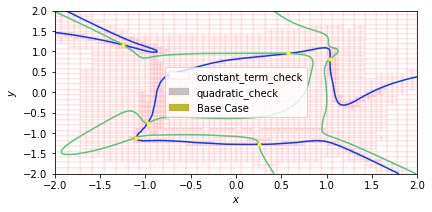

In [35]:
np.random.seed(1)
a = -2*np.ones(2);b = 2*np.ones(2)
f = getPoly(20,2,True)
g = getPoly(28,2,True)
n = 15
f.coeff *= 10**n
g.coeff *= 10**n

tols = dict()
# tols['rel_approx_tol'] = 1e-15
# tols['abs_approx_tol'] = 1e-15
# tols['max_cond_num'] = 1e5
# steps = [2,2,1,3,1,0,2,3,2,0,3,3,1,2,3,2,1,3,1,1,1,0,1,1,1]
# a,b = get_interval(steps,a,b)

r2 = yr.subdivision.solve([f,g],a,b,plot=True,plot_intervals=True,**tols)

In [36]:
r2 - trueRoots

array([[ 0.00000000e+00,  0.00000000e+00],
       [-1.11022302e-16,  0.00000000e+00],
       [-7.88258347e-15, -1.99840144e-15],
       [ 0.00000000e+00,  0.00000000e+00],
       [-1.11022302e-16,  1.11022302e-16],
       [ 0.00000000e+00,  0.00000000e+00]])

In [37]:
endTime = time.time()

In [38]:
endTime - startTime

449.01611614227295

In [ ]:
449.01611614227295
509.1809799671173